In [15]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from pd_doc2vec_threaded import doc2vec

In [70]:
df_jokes = pd.read_csv('shortjokes.csv')

In [71]:
df_not_jokes = pd.read_csv('tweets.csv')

In [72]:
df_jokes.columns

Index(['ID', 'Joke'], dtype='object')

In [73]:
len(df_jokes)

231657

In [74]:
len(df_not_jokes)

597523

In [75]:
df_all_true = pd.DataFrame(columns=['is_joke', 'text'])
df_all_false = pd.DataFrame(columns=['is_joke', 'text'])

In [82]:
df_not_jokes = df_not_jokes.dropna(subset=['text'])
df_not_jokes.reset_index(drop=True, inplace=True)

In [83]:
print(len(df_jokes))
print(len(df_not_jokes))
df_jokes_tmp = df_jokes.truncate(after=199999, copy=True)
df_not_jokes_tmp = df_not_jokes.truncate(after=199999, copy=True)
print(len(df_jokes_tmp))
print(len(df_not_jokes_tmp))

231657
597497
200000
200000


In [84]:
l = [1]*200000
df_all_true['is_joke'] = pd.Series(l)
df_all_true['text'] = df_jokes_tmp['Joke']

In [85]:
l = [0]*200000
df_all_false['is_joke'] = pd.Series(l)
df_all_false['text'] = df_not_jokes_tmp['text']

In [86]:
strings = list(df_all_true['text'])
total_avg = sum( map(len, strings)) / len(strings)
print(total_avg)

strings = list(df_all_false['text'])
total_avg = sum( map(len, strings)) / len(strings)
print(total_avg)

93.039655
111.17468


In [87]:
df_all = pd.concat([df_all_true, df_all_false])
df_all.reset_index(drop=True, inplace=True)

In [88]:
print(len(df_all))
print(df_all.columns)

400000
Index(['is_joke', 'text'], dtype='object')


In [89]:
df_all.head(10)

,is_joke,text
0,1,"[me narrating a documentary about narrators] ""..."
1,1,Telling my daughter garlic is good for you. Go...
2,1,I've been going through a really rough period ...
3,1,"If I could have dinner with anyone, dead or al..."
4,1,Two guys walk into a bar. The third guy ducks.
5,1,Why can't Barbie get pregnant? Because Ken com...
6,1,Why was the musician arrested? He got in treble.
7,1,Did you hear about the guy who blew his entire...
8,1,What do you do if a bird shits on your car? Do...
9,1,He was a real gentlemen and always opened the ...


In [90]:
df_all.tail(10)

,is_joke,text
399990,0,Officials: I-75 to stay open; 1 shelter remain...
399991,0,.@AlachuaSheriff responding to reported shooti...
399992,0,If you don't have power you can still watch ou...
399993,0,"Alachua County schools will be open Monday, di..."
399994,0,"More than 1,500 GRU customers without power in..."
399995,0,Ocala man arrested in January crash that kille...
399996,0,Florida Highway officials allowing motorists t...
399997,0,Man charged with DUI after @GainesvillePD car ...
399998,0,#Gainesville residents honoring local hero #To...
399999,0,Tolls lifted on Florida toll roads indefinitel...


is_joke


100%|██████████| 10/10 [25:57<00:00, 155.72s/it]


Best Accuracy: 0.9442
Labeled F1 Score: 
Tag  F1 Score  Recall Score  Precision Score
0.0  0.943579      0.928557         0.959096
1.0  0.944807      0.960000         0.930088



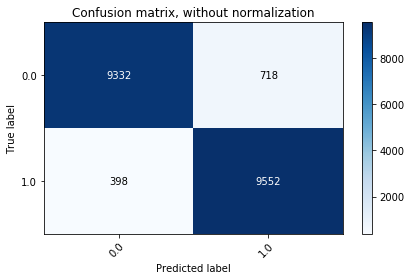

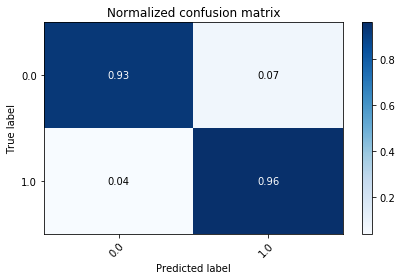

[   Tag  F1 Score  Recall Score  Precision Score
 0  0.0  0.943579      0.928557         0.959096
 1  1.0  0.944807      0.960000         0.930088, 0.9442]

In [91]:
d2v = doc2vec(df_all, 'text', ['is_joke'])
d2v.score(verbose=True, iterations=10)

In [131]:
d2v.predict_text('Why do computer scientists always confuse Halloween and Christmas? Because 31 Oct = 25 Dec.')

['1.0']

In [141]:
d2v.predict_text('This  video is a great way to learn about python, pandas, doc2vec and tqdm.')

['0.0']

In [142]:
d2v.predict_text('There are only 10 kinds of people in this world: those who know binary and those who don’t.')

['1.0']